In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import nbformat
import plotly.io as pio


#pd.set_option('display.max_columns', None)  #show all columns when displaying dataframe
#pd.set_option('display.max_rows', None)  #show all rows when displaying dataframe

tornado_df = pd.read_csv('../Datasets/Tornado_Tracks.csv') #Use relative path to your csv file
#df = df.head()  # first look at dataset

pd.set_option('display.max_columns', None)

tornado_df.head()



,State Abbreviation,State FIPS,Date,Year,Month,Day,"Date (Year, Month, Day)",Time,Time Zone,Magnitude,Width (yards),Length (miles),Fatalities,Injuries,Crop Loss,Property Loss,Tornado Number,State Number,EF Scale (unaltered or previous rating),Starting Latitude,Starting Longitude,Ending Latitude,Ending Longitude,Object ID,Shape Length
0,OK,40,10/1/1950 5:00:00 AM,1950,10,1,1950-10-01,21:00:00,3,1,10,15.8,0,0,0.0,4.0,192,23,0,36.73,-102.52,36.8800,-102.3000,1,32166.649032
1,NC,37,10/9/1950 5:00:00 AM,1950,10,9,1950-10-09,02:15:00,3,3,880,2.0,0,3,0.0,5.0,193,9,0,34.17,-78.60,34.1701,-78.5999,2,17.462751
2,KY,21,11/20/1950 5:00:00 AM,1950,11,20,1950-11-20,02:20:00,3,2,10,0.1,0,0,0.0,5.0,195,1,0,37.37,-87.20,37.3701,-87.1999,3,17.891905
3,KY,21,11/20/1950 5:00:00 AM,1950,11,20,1950-11-20,04:00:00,3,1,10,0.1,0,0,0.0,5.0,196,2,0,38.20,-84.50,38.2001,-84.4999,4,18.016042
4,MS,28,11/20/1950 5:00:00 AM,1950,11,20,1950-11-20,07:30:00,3,1,37,2.0,0,3,0.0,4.0,197,14,0,32.42,-89.13,32.4201,-89.1299,5,17.257657


In [3]:
tornado_df.info() #check info of dataframe (data types, non-null values)
tornado_df.shape  #check shape of dataframe (rows, columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71813 entries, 0 to 71812
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   State Abbreviation                       71813 non-null  object 
 1   State FIPS                               71813 non-null  int64  
 2   Date                                     71813 non-null  object 
 3   Year                                     71813 non-null  int64  
 4   Month                                    71813 non-null  int64  
 5   Day                                      71813 non-null  int64  
 6   Date (Year, Month, Day)                  71813 non-null  object 
 7   Time                                     71813 non-null  object 
 8   Time Zone                                71813 non-null  int64  
 9   Magnitude                                71813 non-null  int64  
 10  Width (yards)                            71813

(71813, 25)

In [4]:
tornado_df.isnull().sum()  #check for null values in each column

State Abbreviation                             0
State FIPS                                     0
Date                                           0
Year                                           0
Month                                          0
Day                                            0
Date (Year, Month, Day)                        0
Time                                           0
Time Zone                                      0
Magnitude                                      0
Width (yards)                                  0
Length (miles)                                 0
Fatalities                                     0
Injuries                                       0
Crop Loss                                      0
Property Loss                                  0
Tornado Number                                 0
State Number                                   0
EF Scale (unaltered or previous rating)        0
Starting Latitude                              0
Starting Longitude  

In [5]:
tornado_df.isna()  #to see any nulls in the dataset 

tornado_df.isna().sum() #to get count by column for any nulls

State Abbreviation                             0
State FIPS                                     0
Date                                           0
Year                                           0
Month                                          0
Day                                            0
Date (Year, Month, Day)                        0
Time                                           0
Time Zone                                      0
Magnitude                                      0
Width (yards)                                  0
Length (miles)                                 0
Fatalities                                     0
Injuries                                       0
Crop Loss                                      0
Property Loss                                  0
Tornado Number                                 0
State Number                                   0
EF Scale (unaltered or previous rating)        0
Starting Latitude                              0
Starting Longitude  

In [6]:
tornado_df['EF Scale (unaltered or previous rating)'].unique()  #trying to determine if this column is needed 
tornado_df['EF Scale (unaltered or previous rating)'].value_counts()



EF Scale (unaltered or previous rating)
0    69950
1     1863
Name: count, dtype: int64

In [7]:
tornado_df['Object ID'].unique()  #trying to determine if this column is needed 
#tornado_df['EF Scale (unaltered or previous rating)'].value_counts()

array([    1,     2,     3, ..., 71811, 71812, 71813], shape=(71813,))

#### Drop columns

DROP
- Date, Year, Month, Day : redundant because there is a column with all of this information - keeping year and month  
- Object ID - appears to be just a numbered listing 
- Fatalities - i only care about if the number of tornados have increased and are moving eastward to create a new tornado alley
- Injuries - same as fatalities
- Property Damage - not relevant to my analysis

KEEP
- State FIPS is a unique identifier for each state, will keep for now.. 
- EF Scale - debated on getting rid of because of the unique counts, but will keep for now
- Shape Length is how far the tornado traveled, will keep -- do I need longitude and latitude if I have this?  Yes if I want to plot on a US Graph later.  



In [8]:
#Drop/Rename Columns
tornado_df.columns


Index(['State Abbreviation', 'State FIPS', 'Date', 'Year', 'Month', 'Day',
       'Date (Year, Month, Day)', 'Time', 'Time Zone', 'Magnitude',
       'Width (yards)', 'Length (miles)', 'Fatalities', 'Injuries',
       'Crop Loss', 'Property Loss', 'Tornado Number', 'State Number',
       'EF Scale (unaltered or previous rating)', 'Starting Latitude',
       'Starting Longitude', 'Ending Latitude', 'Ending Longitude',
       'Object ID', 'Shape Length'],
      dtype='object')

In [9]:
tornado_df.drop(columns=['Date','Day','Fatalities','Injuries','Crop Loss', 'Property Loss','Object ID'], inplace=True)

In [10]:
tornado_df #making sure columns dropped


,State Abbreviation,State FIPS,Year,Month,"Date (Year, Month, Day)",Time,Time Zone,Magnitude,Width (yards),Length (miles),Tornado Number,State Number,EF Scale (unaltered or previous rating),Starting Latitude,Starting Longitude,Ending Latitude,Ending Longitude,Shape Length
0,OK,40,1950,10,1950-10-01,21:00:00,3,1,10,15.80,192,23,0,36.7300,-102.5200,36.8800,-102.3000,32166.649032
1,NC,37,1950,10,1950-10-09,02:15:00,3,3,880,2.00,193,9,0,34.1700,-78.6000,34.1701,-78.5999,17.462751
2,KY,21,1950,11,1950-11-20,02:20:00,3,2,10,0.10,195,1,0,37.3700,-87.2000,37.3701,-87.1999,17.891905
3,KY,21,1950,11,1950-11-20,04:00:00,3,1,10,0.10,196,2,0,38.2000,-84.5000,38.2001,-84.4999,18.016042
4,MS,28,1950,11,1950-11-20,07:30:00,3,1,37,2.00,197,14,0,32.4200,-89.1300,32.4201,-89.1299,17.257657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71808,IN,18,2024,9,2024-09-07,05:58:00,3,-9,10,0.05,624887,0,0,41.7019,-86.9567,41.7012,-86.9562,118.282700
71809,WY,56,2024,9,2024-09-09,14:19:00,3,0,25,0.19,624888,0,0,43.6457,-108.2136,43.6466,-108.2100,423.993166
71810,NY,36,2024,9,2024-09-09,14:33:00,3,0,75,1.20,624889,0,0,43.0333,-79.0102,43.0201,-78.9972,2476.801795
71811,NY,36,2024,9,2024-09-09,15:15:00,3,-9,50,0.10,624890,0,0,43.7565,-75.8837,43.7551,-75.8815,326.393737


In [11]:
#Check column data types
tornado_df.dtypes

State Abbreviation                          object
State FIPS                                   int64
Year                                         int64
Month                                        int64
Date (Year, Month, Day)                     object
Time                                        object
Time Zone                                    int64
Magnitude                                    int64
Width (yards)                                int64
Length (miles)                             float64
Tornado Number                               int64
State Number                                 int64
EF Scale (unaltered or previous rating)      int64
Starting Latitude                          float64
Starting Longitude                         float64
Ending Latitude                            float64
Ending Longitude                           float64
Shape Length                               float64
dtype: object

In [12]:
tornado_df.loc[tornado_df.duplicated(keep=False)] # checking for duplicates

,State Abbreviation,State FIPS,Year,Month,"Date (Year, Month, Day)",Time,Time Zone,Magnitude,Width (yards),Length (miles),Tornado Number,State Number,EF Scale (unaltered or previous rating),Starting Latitude,Starting Longitude,Ending Latitude,Ending Longitude,Shape Length
59808,IA,19,2015,6,2015-06-20,18:32:00,3,1,50,2.92,610626,0,0,40.8123,-91.2844,40.7783,-91.2494,6338.39183
59809,IA,19,2015,6,2015-06-20,18:32:00,3,1,50,2.92,610626,0,0,40.8123,-91.2844,40.7783,-91.2494,6338.39183


In [13]:
tornado_df.drop_duplicates(keep= "first", inplace=True)  #drops duplicates keeping the first instance

In [ ]:
# check again for duplicates after dropping

tornado_df.loc[tornado_df.duplicated(keep=False)] 

,State Abbreviation,State FIPS,Year,Month,"Date (Year, Month, Day)",Time,Time Zone,Magnitude,Width (yards),Length (miles),Tornado Number,State Number,EF Scale (unaltered or previous rating),Starting Latitude,Starting Longitude,Ending Latitude,Ending Longitude,Shape Length


In [15]:
tornado_df.rename({'State Abbreviation': 'State'}, axis=1, inplace=True)
tornado_df.head()

,State,State FIPS,Year,Month,"Date (Year, Month, Day)",Time,Time Zone,Magnitude,Width (yards),Length (miles),Tornado Number,State Number,EF Scale (unaltered or previous rating),Starting Latitude,Starting Longitude,Ending Latitude,Ending Longitude,Shape Length
0,OK,40,1950,10,1950-10-01,21:00:00,3,1,10,15.8,192,23,0,36.73,-102.52,36.8800,-102.3000,32166.649032
1,NC,37,1950,10,1950-10-09,02:15:00,3,3,880,2.0,193,9,0,34.17,-78.60,34.1701,-78.5999,17.462751
2,KY,21,1950,11,1950-11-20,02:20:00,3,2,10,0.1,195,1,0,37.37,-87.20,37.3701,-87.1999,17.891905
3,KY,21,1950,11,1950-11-20,04:00:00,3,1,10,0.1,196,2,0,38.20,-84.50,38.2001,-84.4999,18.016042
4,MS,28,1950,11,1950-11-20,07:30:00,3,1,37,2.0,197,14,0,32.42,-89.13,32.4201,-89.1299,17.257657


In [16]:
tornado_counts = tornado_df.groupby('State').size().reset_index(name='tornado_counts')
average_per_state = tornado_counts.groupby('State')['tornado_counts'].mean()

average_per_state

State
AK       5.0
AL    2597.0
AR    2028.0
AZ     291.0
CA     480.0
CO    2445.0
CT     125.0
DC       3.0
DE      73.0
FL    3733.0
GA    1929.0
HI      41.0
IA    3010.0
ID     224.0
IL    2974.0
IN    1662.0
KS    4545.0
KY    1181.0
LA    2400.0
MA     187.0
MD     409.0
ME     134.0
MI    1106.0
MN    2148.0
MO    2555.0
MS    2731.0
MT     444.0
NC    1515.0
ND    1654.0
NE    3155.0
NH      99.0
NJ     186.0
NM     661.0
NV      96.0
NY     525.0
OH    1352.0
OK    4372.0
OR     132.0
PA     956.0
PR      32.0
RI      17.0
SC    1206.0
SD    1924.0
TN    1392.0
TX    9476.0
UT     137.0
VA     821.0
VI       1.0
VT      49.0
WA     134.0
WI    1557.0
WV     164.0
WY     739.0
Name: tornado_counts, dtype: float64

In [17]:
top_20_states = average_per_state.sort_values(ascending=False).head(20)
top_20_states


State
TX    9476.0
KS    4545.0
OK    4372.0
FL    3733.0
NE    3155.0
IA    3010.0
IL    2974.0
MS    2731.0
AL    2597.0
MO    2555.0
CO    2445.0
LA    2400.0
MN    2148.0
AR    2028.0
GA    1929.0
SD    1924.0
IN    1662.0
ND    1654.0
WI    1557.0
NC    1515.0
Name: tornado_counts, dtype: float64

In [18]:
tornado_counts = tornado_df.groupby(['State', 'Year']).size().reset_index(name='tornado_counts')
tornado_counts

,State,Year,tornado_counts
0,AK,1959,1
1,AK,2004,2
2,AK,2005,1
3,AK,2024,1
4,AL,1950,2
...,...,...,...
3220,WY,2020,4
3221,WY,2021,1
3222,WY,2022,2
3223,WY,2023,21


#### Pivot table

Created a pivot table to organize the data in an easier to view way 

In [19]:
pivot_table = tornado_counts.pivot(index='State', columns='Year', values='tornado_counts').fillna(0)
pivot_table

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AL,2.0,5.0,11.0,22.0,9.0,6.0,5.0,45.0,21.0,8.0,11.0,22.0,11.0,20.0,26.0,9.0,9.0,24.0,10.0,12.0,14.0,22.0,14.0,45.0,39.0,34.0,30.0,21.0,22.0,23.0,27.0,14.0,22.0,45.0,42.0,42.0,14.0,7.0,16.0,23.0,19.0,10.0,24.0,8.0,18.0,37.0,33.0,29.0,50.0,23.0,44.0,55.0,34.0,42.0,55.0,81.0,69.0,40.0,93.0,79.0,37.0,136.0,55.0,21.0,52.0,31.0,63.0,57.0,44.0,80.0,70.0,65.0,98.0,73.0,68.0
AR,12.0,2.0,26.0,9.0,26.0,22.0,13.0,27.0,7.0,9.0,28.0,36.0,6.0,2.0,28.0,24.0,5.0,17.0,18.0,2.0,18.0,15.0,14.0,50.0,11.0,21.0,27.0,20.0,44.0,41.0,22.0,10.0,76.0,16.0,23.0,9.0,3.0,2.0,12.0,18.0,20.0,13.0,4.0,17.0,16.0,24.0,28.0,45.0,35.0,103.0,37.0,39.0,33.0,61.0,48.0,69.0,23.0,15.0,80.0,42.0,31.0,72.0,18.0,31.0,20.0,20.0,23.0,37.0,34.0,29.0,42.0,32.0,40.0,29.0,47.0
AZ,0.0,0.0,1.0,0.0,2.0,1.0,3.0,5.0,4.0,2.0,2.0,3.0,3.0,1.0,2.0,0.0,5.0,5.0,5.0,4.0,3.0,7.0,17.0,2.0,10.0,1.0,5.0,2.0,2.0,3.0,1.0,3.0,1.0,5.0,4.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,13.0,8.0,5.0,4.0,9.0,5.0,2.0,5.0,0.0,3.0,0.0,9.0,3.0,8.0,6.0,0.0,3.0,4.0,12.0,3.0,1.0,1.0,3.0,5.0,1.0,3.0,5.0,12.0,2.0,6.0,9.0,5.0,7.0
CA,0.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,10.0,1.0,1.0,1.0,4.0,0.0,4.0,5.0,5.0,5.0,0.0,1.0,2.0,2.0,4.0,1.0,3.0,3.0,6.0,3.0,14.0,4.0,8.0,3.0,14.0,9.0,2.0,3.0,8.0,4.0,6.0,4.0,5.0,16.0,20.0,13.0,9.0,7.0,22.0,17.0,25.0,3.0,9.0,7.0,3.0,0.0,10.0,30.0,9.0,6.0,7.0,2.0,8.0,9.0,12.0,4.0,9.0,10.0,4.0,3.0,6.0,14.0,8.0,4.0,4.0,10.0,4.0
CO,2.0,8.0,3.0,14.0,9.0,18.0,10.0,24.0,18.0,1.0,14.0,13.0,25.0,3.0,2.0,32.0,11.0,21.0,6.0,10.0,5.0,16.0,11.0,11.0,12.0,20.0,42.0,31.0,18.0,37.0,24.0,25.0,58.0,32.0,41.0,26.0,20.0,40.0,47.0,22.0,55.0,76.0,81.0,71.0,46.0,48.0,98.0,47.0,38.0,41.0,60.0,46.0,25.0,29.0,84.0,34.0,20.0,55.0,39.0,42.0,71.0,21.0,33.0,26.0,49.0,54.0,39.0,19.0,45.0,49.0,35.0,48.0,31.0,88.0,20.0
CT,2.0,3.0,0.0,0.0,2.0,2.0,1.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,3.0,8.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,4.0,1.0,1.0,2.0,2.0,0.0,4.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,6.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,9.0,1.0,7.0,8.0,1.0,3.0,1.0
DC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
DE,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0,1.0,6.0,5.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,4.0,2.0,0.0,3.0,1.0


Narrowing the data down by just Kentucky to see what it looks like

In [20]:
kentucky_df = tornado_df[tornado_df['State'] == 'KY']
ky_tornado_counts = kentucky_df.groupby(['Year']).size().reset_index(name='ky_tornado_counts')
ky_tornado_counts   

,Year,ky_tornado_counts
0,1950,2
1,1951,2
2,1952,2
3,1954,3
4,1955,3
...,...,...
69,2020,22
70,2021,36
71,2022,32
72,2023,34


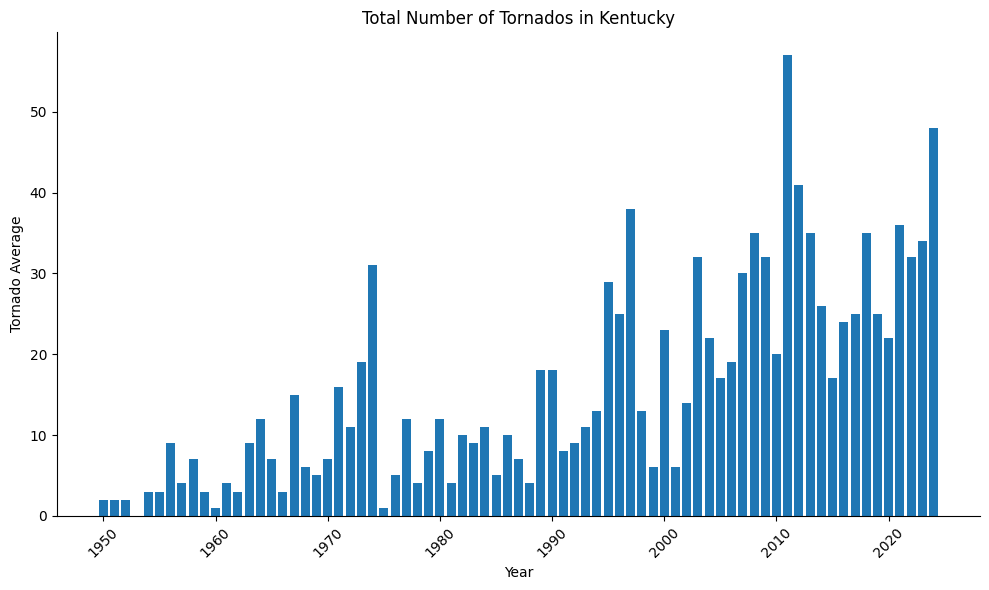

In [21]:
plt.figure(figsize=(10,6))
plt.bar(ky_tornado_counts['Year'],ky_tornado_counts['ky_tornado_counts'])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Year")
plt.ylabel("Tornado Average")  
plt.title("Total Number of Tornados in Kentucky")
plt.xticks(rotation=45, ha='center')

plt.tight_layout()
plt.show()

#### Observation

The number of tornados in Kentucy has been increasing over time but is that because there are actually more or because we are better at tracking them?   
It almost looks cyclical.  There is a bit of a jump, and then the count goes back down and starts to climb again.  

In [22]:
# get coordinates to set up a heatmap
tornado_coords = kentucky_df[['Starting Latitude', 'Starting Longitude']].values.tolist()
kentucky_coords = pd.DataFrame(tornado_coords, columns=['lat', 'lon'])


#### Heatmap

Wanted to do a heatmap using lat/long but decided visually this doesn't mean anything.. obviously more tornados are in one area but I have no idea what part of KY by looking at this map.  

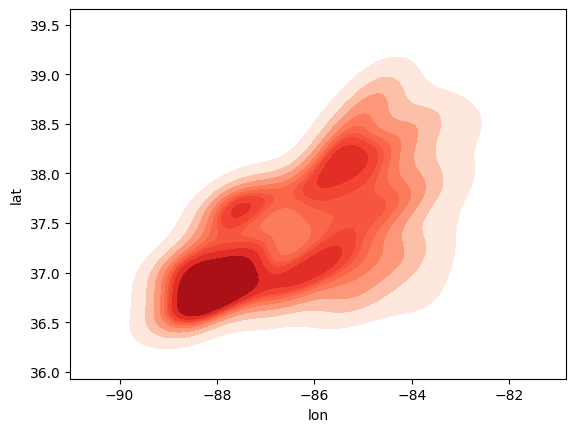

In [23]:


kentucky_df = pd.DataFrame(tornado_coords, columns=['starting latitude', 'starting longitude'])
sns.kdeplot(data=kentucky_coords, x='lon', y='lat', fill=True, cmap='Reds')
plt.show()

#### Lets try an interactive heatmap instead

- This heatmap produced slightly better results.  These results are over a 50 year period so it is hard to tell if there is a pattern.  I think if I narrowed it down to a 10 year period it would be easier to see if there is a pattern.

In [24]:

pio.renderers.default = 'browser' 

fig = px.density_mapbox(
    kentucky_df,
    lat='starting latitude',
    lon='starting longitude',
    radius=10,
    center=dict(lat=37.5, lon=-85.0),
    zoom=6,
    mapbox_style='carto-positron'
)
fig.show()


C:\Users\Eduke\AppData\Local\Temp\1\ipykernel_38100\190862157.py:3: DeprecationWarning:

*density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

